In [17]:
import pandas as pd
import chardet
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Utility Functions

In [2]:
def remove_accents(s):
    if isinstance(s, str):
        nfkd_form = unicodedata.normalize("NFKD", s)
        return "".join(c for c in nfkd_form if not unicodedata.combining(c))
    return s  # leave non-strings untouched

In [21]:
def plot_histogram(df, column, bins=30):
    """
    Plots a histogram for a single numerical column from a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the numeric column to plot.
        bins (int): Number of bins in the histogram.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise TypeError(f"Column '{column}' is not numeric.")
    
    col_min, col_max = df[column].min(), df[column].max()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=bins, color='skyblue', edgecolor='black', binrange=(col_min, col_max))
    plt.title(f"Histogram of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xlim(col_min, col_max)
    plt.show()

In [25]:
def remove_outliers(df, column, n_std=3):
    """
    Removes values in a column that are more than `n_std` standard deviations from the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): Name of the numeric column to clean.
        n_std (float): Number of standard deviations to use as the cutoff.

    Returns:
        pd.DataFrame: A copy of the DataFrame with outliers removed.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise TypeError(f"Column '{column}' is not numeric.")
    
    mean = df[column].mean()
    std = df[column].std()
    
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

In [59]:
def unique_values_non_numeric(df):
    """
    Prints the number and list of unique values for each non-numeric column in a DataFrame.
    """
    non_numeric_cols = df.select_dtypes(exclude='number').columns
    
    for col in non_numeric_cols:
        uniques = df[col].unique()
        print(f"Column: {col}")
        print(f"  Unique count: {df[col].nunique()}")
        print(f"  Unique values: {uniques}\n")


In [86]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_non_numeric_distributions(df):
    """
    Plots the distribution of unique values for each non-numerical column in the dataframe.
    Each column gets its own subplot in a single figure.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
    """
    # Select only non-numerical columns
    non_num_cols = df.select_dtypes(exclude=['number']).columns
    n_cols = len(non_num_cols)

    # Create subplots (one per non-numeric column)
    fig, axes = plt.subplots(n_cols, 1, figsize=(10, 5 * n_cols))

    # If there's only one column, axes won't be an array
    if n_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, non_num_cols):
        counts = df[col].value_counts()
        counts.plot(kind='bar', ax=ax)
        ax.set_title(f"Distribution of '{col}'")
        ax.set_ylabel("Count")
        ax.set_xlabel("Unique Values")

    plt.tight_layout()
    plt.show()

# Exploratory Data Analisis

## CSV data initial exploration
## Catergory CSV

In [39]:
category_df = pd.read_csv("data/categoria.csv")
category_df

,id,categoria
0,1,SCOTCH WHISKIES
1,2,STRAIGHT BOURBON WHISKIES
2,3,BLENDED WHISKIES
3,4,IMPORTED DRY GINS
4,5,DECANTERS & SPECIALTY PACKAGES
...,...,...
96,97,PRIVATE LABEL TEQUILA
97,98,AMARETTO - IMPORTED
98,99,HIGH PROOF BEER - AMERICAN
99,100,SPECIALTY ITEMS - SPIRITS - AME


### Statistics

In [37]:
category_df.describe()

,id
count,101.000000
mean,51.000000
std,29.300171
min,1.000000
25%,26.000000
50%,51.000000
75%,76.000000
max,101.000000


### Data quality

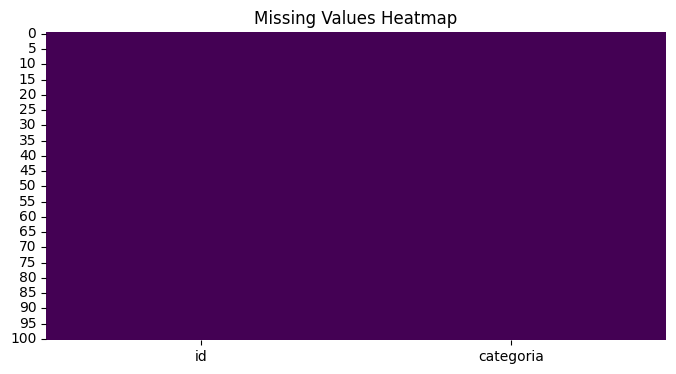

In [5]:
# Create boolean mask of missing values
missing_mask_category = category_df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(missing_mask_category, cbar=False, cmap='viridis')  # True=yellow, False=purple
plt.title("Missing Values Heatmap")
plt.show()

In [35]:
category_df.isnull().sum()

id           0
categoria    0
dtype: int64

In [36]:
category_df.duplicated().sum()

np.int64(0)

### Data types

In [38]:
category_df.dtypes

id            int64
categoria    object
dtype: object

## Client CSV

In [6]:
with open("data/cliente.csv", "rb") as f:
    data = f.read()

print(chardet.detect(data))

{'encoding': 'MacRoman', 'confidence': 0.6981229831235533, 'language': ''}


In [7]:
client_df = pd.read_csv("data/cliente.csv", encoding="MacRoman")
client_df

,id,nombre,apellido,nacimiento,genero,empresa,idioma,nit,puesto,ciudad,correo,telefono
0,599528.0,Samuel,Ward,4/6/89,Male,Yakijo,Marathi,411-44-7088,Geologist IV,Wangjing,sward0@tamu.edu,86-(786)608-5061
1,121688.0,Willie,Gonzales,6/29/72,Male,Zoonoodle,Maltese,701-87-7540,Programmer III,El Corozo,wgonzales1@apache.org,58-(265)301-3397
2,552148.0,Betty,Spencer,9/2/83,Female,Youtags,Dhivehi,373-88-4503,Engineer III,Jinhua,bspencer2@shutterfly.com,86-(195)193-9042
3,102019.0,Beverly,Jordan,1/15/72,Female,Fivespan,Hindi,447-80-5871,Software Test Engineer IV,Salvacion,bjordan3@vimeo.com,63-(652)708-7688
4,189384.0,Cynthia,Flores,2/6/71,Female,Jabbersphere,Tsonga,803-60-8259,Speech Pathologist,Khorol,cflores4@webeden.co.uk,380-(373)389-5435
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
client_df = client_df.applymap(remove_accents)
client_df

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_56745/2902310671.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  client_df = client_df.applymap(remove_accents)


,id,nombre,apellido,nacimiento,genero,empresa,idioma,nit,puesto,ciudad,correo,telefono
0,599528.0,Samuel,Ward,4/6/89,Male,Yakijo,Marathi,411-44-7088,Geologist IV,Wangjing,sward0@tamu.edu,86-(786)608-5061
1,121688.0,Willie,Gonzales,6/29/72,Male,Zoonoodle,Maltese,701-87-7540,Programmer III,El Corozo,wgonzales1@apache.org,58-(265)301-3397
2,552148.0,Betty,Spencer,9/2/83,Female,Youtags,Dhivehi,373-88-4503,Engineer III,Jinhua,bspencer2@shutterfly.com,86-(195)193-9042
3,102019.0,Beverly,Jordan,1/15/72,Female,Fivespan,Hindi,447-80-5871,Software Test Engineer IV,Salvacion,bjordan3@vimeo.com,63-(652)708-7688
4,189384.0,Cynthia,Flores,2/6/71,Female,Jabbersphere,Tsonga,803-60-8259,Speech Pathologist,Khorol,cflores4@webeden.co.uk,380-(373)389-5435
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Statistics

In [40]:
category_df.describe()

,id
count,101.000000
mean,51.000000
std,29.300171
min,1.000000
25%,26.000000
50%,51.000000
75%,76.000000
max,101.000000


In [31]:
client_df.columns

Index(['id', 'nombre', 'apellido', 'nacimiento', 'genero', 'empresa', 'idioma',
       'nit', 'puesto', 'ciudad', 'correo', 'telefono'],
      dtype='object')

### Data Quality

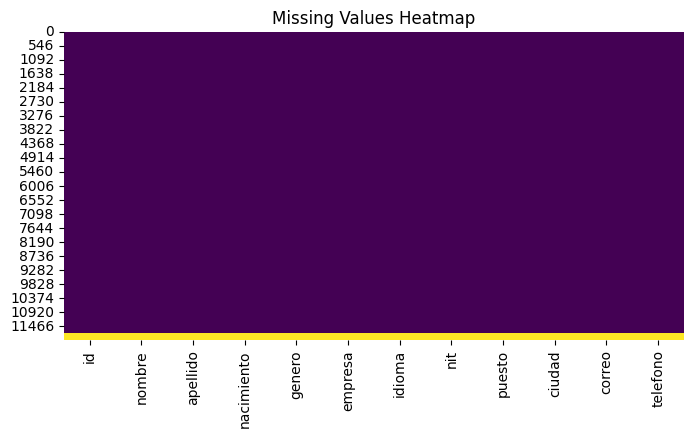

In [9]:
# Create boolean mask of missing values
missing_mask_client = client_df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(missing_mask_client, cbar=False, cmap='viridis')  # True=yellow, False=purple
plt.title("Missing Values Heatmap")
plt.show()

In [41]:
category_df.isnull().sum()

id           0
categoria    0
dtype: int64

In [42]:
category_df.duplicated().sum()

np.int64(0)

### Data Types

In [43]:
category_df.dtypes

id            int64
categoria    object
dtype: object

## Events CSV

In [10]:
events_df = pd.read_csv("data/events.csv")
events_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


### Statistics

In [47]:
events_df.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


### Data Quality

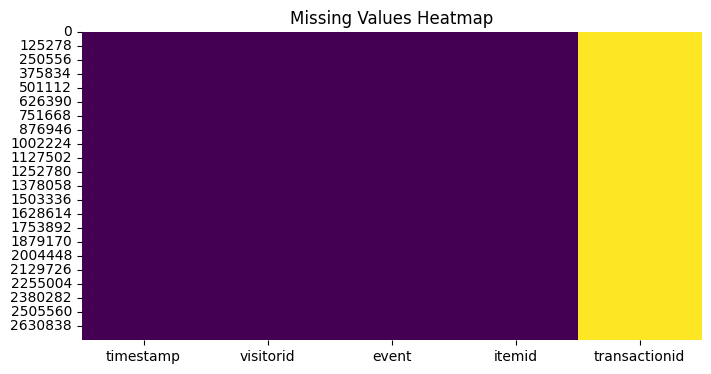

In [11]:
# Create boolean mask of missing values
missing_mask_events = events_df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(missing_mask_events, cbar=False, cmap='viridis')  # True=yellow, False=purple
plt.title("Missing Values Heatmap")
plt.show()

In [44]:
events_df.isna().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [45]:
events_df.duplicated().sum()

np.int64(460)

In [60]:
unique_values_non_numeric(df=events_df)

Column: event
  Unique count: 3
  Unique values: ['view' 'addtocart' 'transaction']



### Data Types

In [46]:
events_df.dtypes

timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object

## Brand CSV

In [48]:
brand_df = pd.read_csv("data/marca.csv")
brand_df

,id,marca
0,1,Diageo Americas
1,2,Heaven Hill Brands
2,3,"Sazerac Co., Inc."
3,4,Sage Beverages
4,5,MHW Ltd
...,...,...
302,303,Breuckelen Distilling
303,304,Iowa ABD
304,305,Park Street-G'Day
305,306,Royal Wine Corporation


### Statistics

In [49]:
brand_df.describe()

,id
count,307.000000
mean,154.000000
std,88.767487
min,1.000000
25%,77.500000
50%,154.000000
75%,230.500000
max,307.000000


### Data Quality

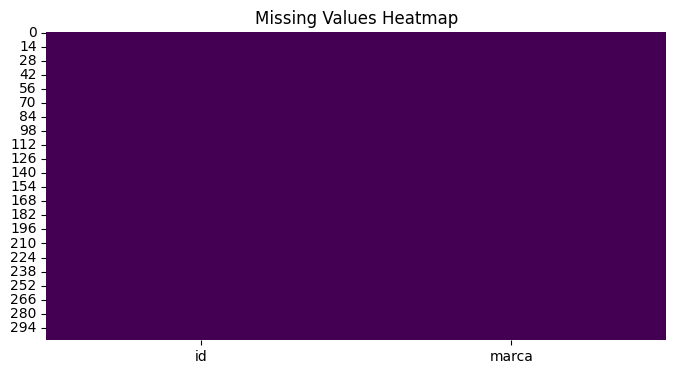

In [13]:
# Create boolean mask of missing values
missing_mask_brand = brand_df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(missing_mask_brand, cbar=False, cmap='viridis')  # True=yellow, False=purple
plt.title("Missing Values Heatmap")
plt.show()

In [50]:
brand_df.isna().sum()

id       0
marca    0
dtype: int64

In [52]:
brand_df.duplicated().sum()

np.int64(0)

### Data Types

In [53]:
brand_df.dtypes

id        int64
marca    object
dtype: object

## Product CSV

In [14]:
product_df = pd.read_csv("data/producto.csv") 
product_df

,id,categoria_id,nombre,marca_id,volumen,precio
0,356475,9.0,Crown Royal Honey,1.0,750,22.49
1,15335,9.0,Crown Royal Regal Apple Mini,1.0,300,11.03
2,81345,9.0,Crown Royal Regal Apple,1.0,200,7.08
3,150318,9.0,Crown Royal Xr Canadian Whiskey,1.0,750,98.99
4,310791,9.0,Crown Royal Canadian Whisky Mini,1.0,300,11.03
...,...,...,...,...,...,...
12021,15212,NaN,Generic Drink,NaN,750,7.25
12022,419980,NaN,Generic Drink,NaN,1000,8.63
12023,160671,NaN,Generic Drink,NaN,1000,8.63
12024,384823,NaN,Generic Drink,NaN,750,7.25


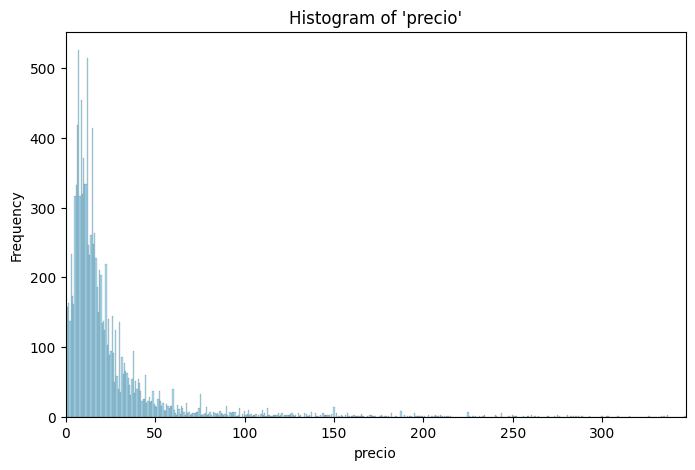

In [29]:
product_df_clean = remove_outliers(product_df, 'precio', n_std=1)
plot_histogram(product_df_clean,'precio', bins=500)

### Statistics

In [28]:
product_df.describe()

,id,categoria_id,marca_id,volumen,precio
count,12026.000000,10998.000000,11150.000000,12026.000000,12020.000000
mean,233928.299850,23.148663,41.812735,1033.562448,38.770502
std,133810.910123,20.469181,62.779059,4717.072506,309.980074
min,15.000000,1.000000,1.000000,0.000000,0.000000
25%,117674.750000,7.000000,7.000000,750.000000,8.250000
50%,234303.500000,18.000000,19.000000,750.000000,14.250000
75%,349531.750000,37.000000,39.000000,750.000000,25.500000
max,466861.000000,101.000000,307.000000,225000.000000,9702.000000


### Data Quality

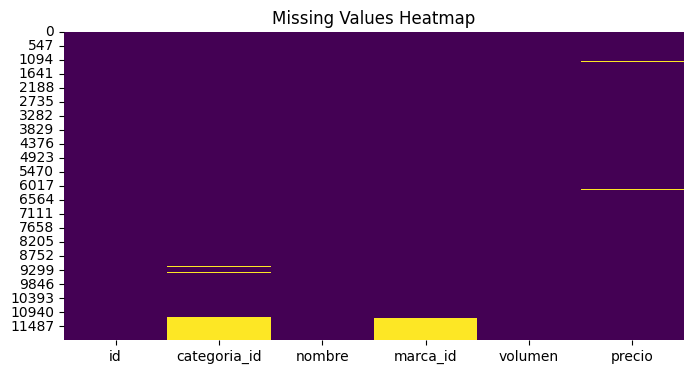

In [ ]:
# Create boolean mask of missing values
missing_mask_product = product_df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(missing_mask_product, cbar=False, cmap='viridis')  # True=yellow, False=purple
plt.title("Missing Values Heatmap")
plt.show()

In [54]:
product_df.isna().sum()

id                 0
categoria_id    1028
nombre             0
marca_id         876
volumen            0
precio             6
dtype: int64

In [56]:
product_df.duplicated().sum()

np.int64(0)

### Data Types

In [57]:
product_df.dtypes

id                int64
categoria_id    float64
nombre           object
marca_id        float64
volumen           int64
precio          float64
dtype: object

# Observaciones

## Clientes con mas compras

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_56745/781308401.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=merged_df.total_compras, x=merged_df.nombre, palette='Blues_r')


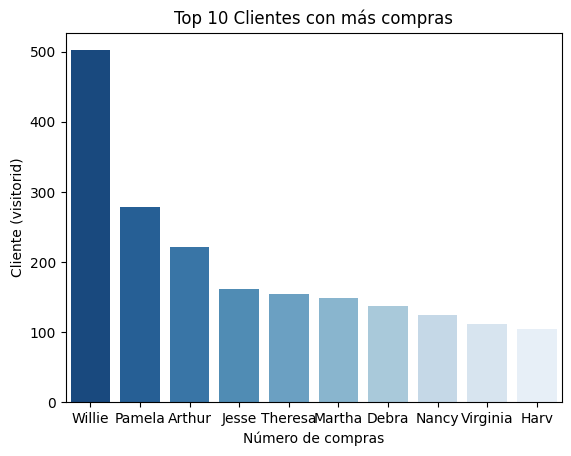

In [76]:
# Filtrar solo eventos de compra
compras = events_df[events_df['event'] == 'transaction']

# Contar compras por cliente
compras_por_cliente = compras.groupby('visitorid')['transactionid'].nunique().sort_values(ascending=False).to_frame(name='total_compras')

# Mostrar top 10
compras_por_cliente

merged_df = pd.merge(
    compras_por_cliente, 
    client_df, 
    left_on='visitorid', 
    right_on='id', 
    how='outer'
)
merged_df = merged_df[['nombre', 'apellido', 'total_compras']].sort_values(by='total_compras', ascending=False)
merged_df = merged_df.head(10)

top_clients = compras_por_cliente.head(10)
sns.barplot(y=merged_df.total_compras, x=merged_df.nombre, palette='Blues_r')
plt.xlabel("Número de compras")
plt.ylabel("Cliente (visitorid)")
plt.title("Top 10 Clientes con más compras")
plt.show()

## Productos mas comprados

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_56745/3528076202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transactionid', y='nombre', data=top_products, palette='Greens_r')


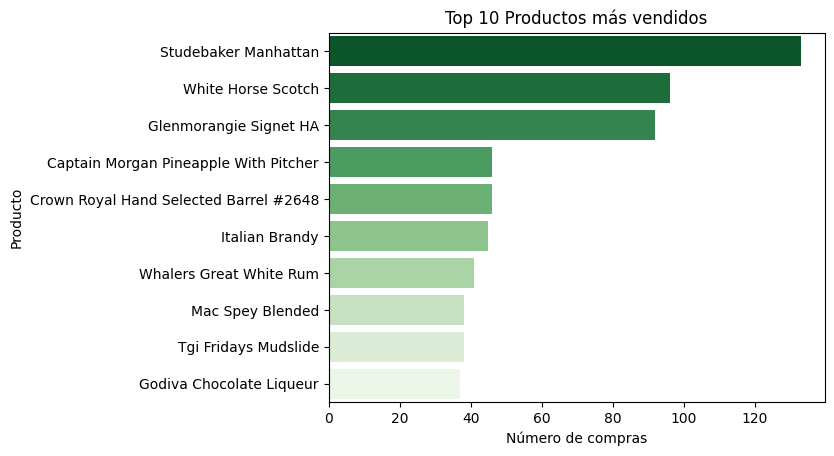

In [91]:
# Contar compras por producto
productos_comprados = compras.groupby('itemid')['transactionid'].nunique().sort_values(ascending=False)

# Top 10 productos
top_products = productos_comprados.head(10).reset_index()
top_products = top_products.merge(product_df[['id', 'nombre']], left_on='itemid', right_on='id')

sns.barplot(x='transactionid', y='nombre', data=top_products, palette='Greens_r')
plt.xlabel("Número de compras")
plt.ylabel("Producto")
plt.title("Top 10 Productos más vendidos")
plt.show()

## Marcas mas populares

     id_x  categoria_id                            nombre  marca_id  volumen  \
0  356475           9.0                 Crown Royal Honey       1.0      750   
1   15335           9.0      Crown Royal Regal Apple Mini       1.0      300   
2   81345           9.0           Crown Royal Regal Apple       1.0      200   
3  150318           9.0   Crown Royal Xr Canadian Whiskey       1.0      750   
4  310791           9.0  Crown Royal Canadian Whisky Mini       1.0      300   

   precio  id_y            marca  
0   22.49   1.0  Diageo Americas  
1   11.03   1.0  Diageo Americas  
2    7.08   1.0  Diageo Americas  
3   98.99   1.0  Diageo Americas  
4   11.03   1.0  Diageo Americas  


/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_56745/1174847119.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='Oranges_r')


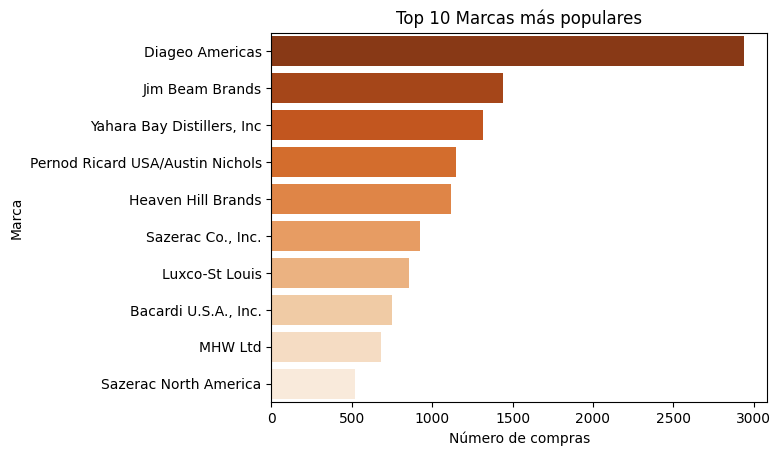

In [ ]:
# Unir productos con marcas
productos_marcas = product_df.merge(brand_df, left_on='marca_id', right_on='id', how='left')

# Contar compras por marca
marcas_compradas = compras.merge(productos_marcas, left_on='itemid', right_on='id_x', how='left')
marcas_count = marcas_compradas.groupby('marca')['transactionid'].nunique().sort_values(ascending=False)

# Top 10 marcas
top_brands = marcas_count.head(10)

sns.barplot(x=top_brands.values, y=top_brands.index, palette='Oranges_r')
plt.xlabel("Número de compras")
plt.ylabel("Marca")
plt.title("Top 10 Marcas más populares")
plt.show()

/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_56745/1584045142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='pastel')


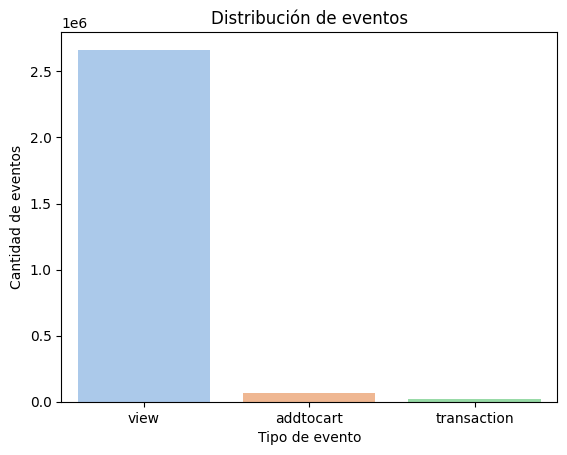

In [81]:
# Contar eventos por tipo
event_counts = events_df['event'].value_counts()

sns.barplot(x=event_counts.index, y=event_counts.values, palette='pastel')
plt.ylabel("Cantidad de eventos")
plt.xlabel("Tipo de evento")
plt.title("Distribución de eventos")
plt.show()

count    12020.000000
mean        38.770502
std        309.980074
min          0.000000
25%          8.250000
50%         14.250000
75%         25.500000
max       9702.000000
Name: precio, dtype: float64


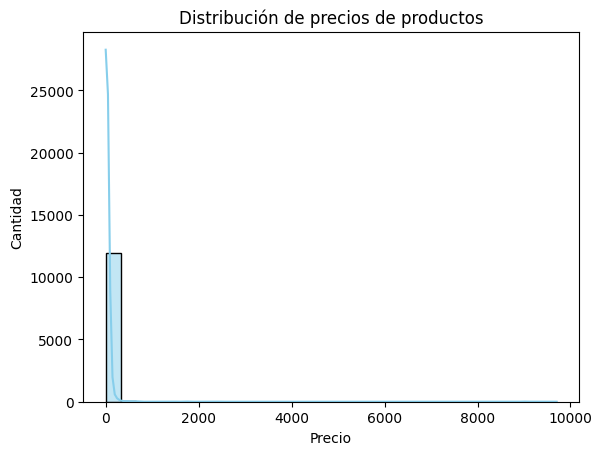

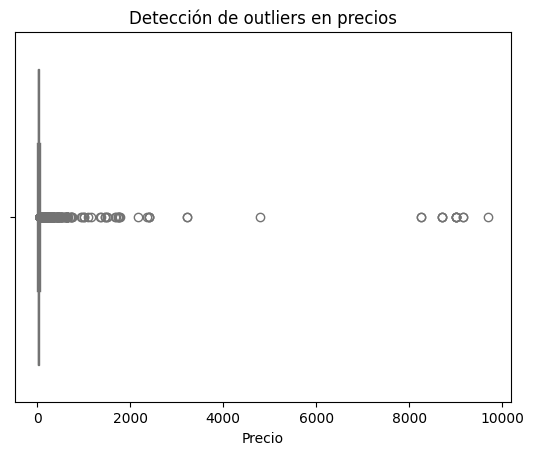

In [ ]:
# Histograma
sns.histplot(product_df['precio'], bins=30, color='skyblue', kde=True)
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Distribución de precios de productos")
plt.show()

# Boxplot para outliers
sns.boxplot(x=product_df['precio'], color='lightgreen')
plt.xlabel("Precio")
plt.title("Detección de outliers en precios")
plt.show()

In [99]:
# top_products = top_products.merge(product_df[['id', 'nombre']], left_on='itemid', right_on='id')
# top_products

my_dict = dict(zip(category_df.iloc[:, 0], category_df.iloc[:, 1]))
# my_dict = dict(zip(category_df[category_df.columns[0]], category_df[category_df.columns[1]]))
my_dict

{1: 'SCOTCH WHISKIES',
 2: 'STRAIGHT BOURBON WHISKIES',
 3: 'BLENDED WHISKIES',
 4: 'IMPORTED DRY GINS',
 5: 'DECANTERS & SPECIALTY PACKAGES',
 6: 'VODKA 80 PROOF',
 7: 'VODKA FLAVORED',
 8: 'PUERTO RICO & VIRGIN ISLANDS RUM',
 9: 'CANADIAN WHISKIES',
 10: 'SPICED RUM',
 11: 'SINGLE MALT SCOTCH',
 12: 'PRIVATE LABEL BRANDY',
 13: 'MISCELLANEOUS  BRANDIES',
 14: 'AMERICAN COCKTAILS',
 15: 'IMPORTED GRAPE BRANDIES',
 16: 'COFFEE LIQUEURS',
 17: 'AMERICAN DRY GINS',
 18: 'IMPORTED ALE',
 19: 'IMPORTED VODKA',
 20: 'WHISKEY LIQUEUR',
 21: 'PRIVATE LABEL CANADIAN WHISKY',
 22: 'IRISH WHISKIES',
 23: 'STRAIGHT RYE WHISKIES',
 24: 'FLAVORED RUM',
 25: 'SAMPLE',
 26: 'JAPANESE WHISKY',
 27: 'BOTTLED IN BOND BOURBON',
 28: 'MISCELLANEOUS SCHNAPPS',
 29: 'PRIVATE LABEL BOURBON',
 30: 'SINGLE BARREL BOURBON WHISKIES',
 31: 'DISTILLED SPIRITS SPECIALTY',
 32: 'TENNESSEE WHISKIES',
 33: 'PRIVATE LABEL BLENDED WHISKEY',
 34: 'MISC. AMERICAN CORDIALS & LIQUEURS',
 35: 'PRIVATE LABEL BLEND WHISKY',
 3